In [13]:
import tensorflow as tf

In [18]:
import matplotlib.pyplot as plt
def showImage(img):
    plt.grid(False)
    plt.gray()
    plt.axis('off')
    plt.imshow(img)
    plt.show()

### Load the model : 

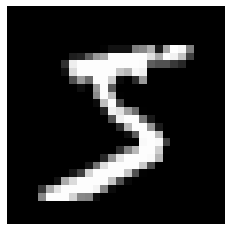

In [22]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
showImage(training_images[0])


In [15]:
training_images = training_images/255.0
test_images = test_images/255.0
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images,training_labels,epochs=5)
test_loss,test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss : {test_loss}, Test Accuracy : {test_accuracy*100:.2f}%")

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2634 - accuracy: 0.9245
Epoch 2/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.1136 - accuracy: 0.9666
Epoch 3/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0771 - accuracy: 0.9768
Epoch 4/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0581 - accuracy: 0.9825
Epoch 5/5
10000/10000 [==============================] - 1s 67us/sample - loss: 0.0756 - accuracy: 0.9762
Test Loss : 0.07564739995636045, Test Accuracy : 97.620
